In [26]:
import tweepy
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
import community

In [2]:
consumer_key = '************************'
consumer_secret = '**********************'
access_token = '*********************'
access_token_secret = '***********************'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
user=api.get_user(screen_name='nammi_suraj')
print("My account is :" ,user.screen_name)
source_user=user.id
print('my account id is :', source_user )

My account is : nammi_suraj
my account id is : 850946013263273987


In [5]:
friends=api.get_follower_ids(screen_name='nammi_suraj')
#fof=api.get_follower_ids(friends)
print('followers of main user ', source_user,':' ,friends)


followers of main user  850946013263273987 : [768168025937752064, 1620606686670065664, 1423771899222536193, 1502090100498661376, 1320633302525513728, 624845023, 1272032230827716609, 2889473923, 1186503108735709184, 769066987918155777, 1203972326083006464, 398056342, 1148614255396024320]


In [6]:
print(friends)
df=pd.DataFrame(columns=['source','target'])
df['target']=friends
df['source']=source_user
#print(df)

[768168025937752064, 1620606686670065664, 1423771899222536193, 1502090100498661376, 1320633302525513728, 624845023, 1272032230827716609, 2889473923, 1186503108735709184, 769066987918155777, 1203972326083006464, 398056342, 1148614255396024320]
                source               target
0   850946013263273987   768168025937752064
1   850946013263273987  1620606686670065664
2   850946013263273987  1423771899222536193
3   850946013263273987  1502090100498661376
4   850946013263273987  1320633302525513728
5   850946013263273987            624845023
6   850946013263273987  1272032230827716609
7   850946013263273987           2889473923
8   850946013263273987  1186503108735709184
9   850946013263273987   769066987918155777
10  850946013263273987  1203972326083006464
11  850946013263273987            398056342
12  850946013263273987  1148614255396024320


In [7]:
#Plotting Network Graph of Source_User and Followers 
Graph_source = nx.from_pandas_edgelist(df, 'source', 'target') #converting the df into graph
pos = nx.spring_layout(Graph_source) #specifying the layout for visual

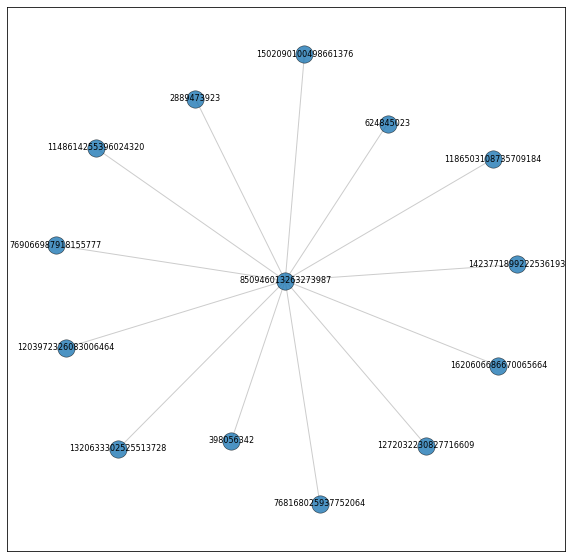

In [8]:
f, ax = plt.subplots(figsize=(10, 10)) #
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(Graph_source, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(Graph_source, pos, font_size=8)
nx.draw_networkx_edges(Graph_source, pos, width=1.0, alpha=0.2)

In [9]:
Graph_source.number_of_nodes() #Number Nodes is Number of followers for the source_user included

14

In [10]:
#Creating Degree Distribution Table
Graph_source_sorted = pd.DataFrame(sorted(Graph_source.degree, key=lambda x: x[1], reverse=True))
Graph_source_sorted.columns = ['nodes','degree']
Graph_source_sorted.head()

,nodes,degree
0,850946013263273987,13
1,768168025937752064,1
2,1620606686670065664,1
3,1423771899222536193,1
4,1502090100498661376,1


In [11]:
#creating Dataframe2 to add sources=followers and target=followers of followers
df2=pd.DataFrame(columns=['source','target'])
for i in friends:
    print("the mainuser is",i)
    network_followers=api.get_follower_ids(user_id=i)

    for t in network_followers:
        df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
    print("the follower_ids of user ",i," are ",network_followers)
    

the mainuser is 768168025937752064


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  768168025937752064  are  [1169222157517221889, 1007274570884116481, 979347954308960256, 844170050168934400, 919949058906583040, 869432693016199168, 416987018, 2953767150, 376878448]
the mainuser is 1620606686670065664
the follower_ids of user  1620606686670065664  are  []
the mainuser is 1423771899222536193


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  1423771899222536193  are  [1578151494330695680, 1574070090659778565, 1443997566719365129, 1583694288638156801, 838050284970467328, 1563470342592507904, 1331893482483372032, 466536209]
the mainuser is 1502090100498661376


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)


the follower_ids of user  1502090100498661376  are  [850946013263273987, 1480873560285478915]
the mainuser is 1320633302525513728


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)


the follower_ids of user  1320633302525513728  are  [850946013263273987]
the mainuser is 624845023


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  624845023  are  [850946013263273987, 1319151683507679232, 1382941744946241538, 1216033508738523136, 1289092098965168129, 919226783739781120, 1276202322230603776, 3186218533]
the mainuser is 1272032230827716609


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)


the follower_ids of user  1272032230827716609  are  [850946013263273987, 1268134854211715072, 66136191]
the mainuser is 2889473923


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  2889473923  are  [1323486335194161152, 1255827719201275905, 1245727948876820481, 850946013263273987, 1154049997165363201, 1186192809885229056, 1200431379160457217, 957911272221065216, 876777770612699136, 387728244]
the mainuser is 1186503108735709184


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  1186503108735709184  are  [3494701213, 982925953251926017, 1275248688684621824, 1256866115013111808, 794576240858435586, 1243218821726359553, 1248011043529297920, 1160118122709278720, 965240223926898690, 494883978, 1213044515516215297, 1215725559134613504, 1205178901846093824, 1225443658859610117, 1179675201891553280, 1211556164325896192, 1168049026228346881, 1382079128, 1001471560773844992, 884764219706556416, 3657335720, 1018128774926397442, 2214058680, 721350140968046592, 1195928871800991745, 1168412846603923457, 1181597809385934850, 1114904594163757056, 4729497019, 830970335293894656, 992591164984430592, 1162991892851642368, 327317601, 1130461794361696256, 1102984520213528577, 1166543550898561025, 1079408362847170566, 955851805719588864]
the mainuser is 769066987918155777


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  769066987918155777  are  [926448312726593536, 1562778148206710785, 1525787719406092288, 1376045243691192323, 1371014394935533568, 1328556454530273282, 1330695543446618114, 1297114700929368064, 1275421878883057668, 1268559073135357952, 1249022896590041088, 1055469666334760961, 1200302067304169472, 1163466764774068227, 2477968636, 1129484920017965056, 3022457132, 1076807229901131776, 1036144302261301249, 1035526658843787264, 1007503828248231936, 846095339698446337, 922429435189526529, 2917613286, 991398532920754176, 955697694294491137, 954923677342035968, 710620920, 925941117358456832, 923435185697300480, 565132407, 922430942345617409, 918381492702658561, 792783199428546560, 734923269074235393, 862527817728307200, 856186008211263488, 4330460775, 823541657568153601, 856750879, 151432966, 782613147089678338, 770876016080347137, 3142266270, 2729919072, 765557239117672449, 4515744498, 759259875700535296]
the mainuser is 1203972326083006464


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  1203972326083006464  are  [850946013263273987, 1239079258443534336, 1164926300370292736, 985519608873467905]
the mainuser is 398056342


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

the follower_ids of user  398056342  are  [850946013263273987, 1524977930698629121, 1510077965366833152, 1264004648823713792, 1158600633739427840, 1156164262512877568, 1082686793596583936, 1158622032327630849, 1158657845853708290, 1158731456446779398, 1158341288476856321, 1158412170985476097, 1129105351746306049, 1158663997152907264, 1158584045954990081, 1158625275355119616, 1158590673039216640, 1158609595998146567, 1035764432960409600, 1158588906222174213, 987213980182573056, 497769198, 35927341]
the mainuser is 1148614255396024320
the follower_ids of user  1148614255396024320  are  [1366385933109526535, 1268042531008245767, 826235053797543936, 1054213057851744256]


/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame([[t,i]], columns=["target","source"]), ignore_index=True)
/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/446642965.py:8: FutureW

In [12]:
#storing all the Data Extracted using Tweepy into dataframe2
print(df2)

                  source               target
0     768168025937752064  1169222157517221889
1     768168025937752064  1007274570884116481
2     768168025937752064   979347954308960256
3     768168025937752064   844170050168934400
4     768168025937752064   919949058906583040
..                   ...                  ...
153            398056342             35927341
154  1148614255396024320  1366385933109526535
155  1148614255396024320  1268042531008245767
156  1148614255396024320   826235053797543936
157  1148614255396024320  1054213057851744256

[158 rows x 2 columns]


In [13]:
#Creating the DataFrame for Network Graph
df3 = df.append(df2, ignore_index=True)

/var/folders/r0/mdhjkk_x1qb3m1dwq254h72h0000gn/T/ipykernel_41560/3624097462.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2, ignore_index=True)


In [14]:
print(df3)

                  source               target
0     850946013263273987   768168025937752064
1     850946013263273987  1620606686670065664
2     850946013263273987  1423771899222536193
3     850946013263273987  1502090100498661376
4     850946013263273987  1320633302525513728
..                   ...                  ...
166            398056342             35927341
167  1148614255396024320  1366385933109526535
168  1148614255396024320  1268042531008245767
169  1148614255396024320   826235053797543936
170  1148614255396024320  1054213057851744256

[171 rows x 2 columns]


In [15]:
#Creating Network Graph using MAP Tool NetworkX and MatPLot
Graph = nx.from_pandas_edgelist(df3, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(Graph) #specify layout for visual
print(Graph)

Graph with 165 nodes and 164 edges


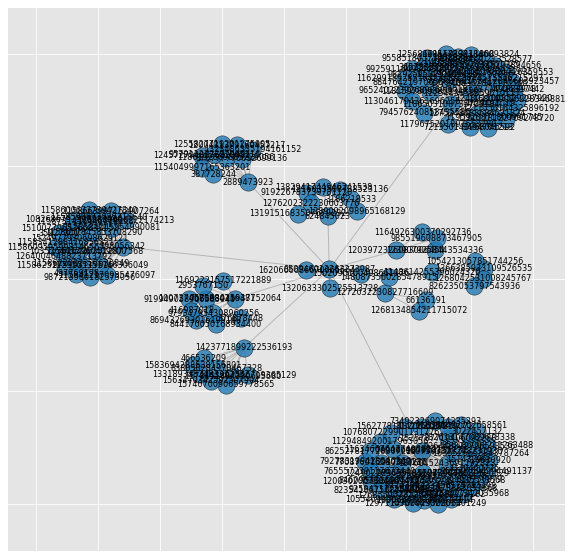

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(Graph, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(Graph, pos, font_size=8)
nx.draw_networkx_edges(Graph, pos, width=1.0, alpha=0.2)

In [18]:
#Creating Degree Distribution Table
Graph_sorted = pd.DataFrame(sorted(Graph.degree, key=lambda x: x[1], reverse=True))
Graph_sorted.columns = ['node','degree']
Graph_sorted.head()
Degree_Dist=Graph_sorted.groupby('degree').count()
print(Degree_Dist)

        node
degree      
1        153
2          1
3          1
4          1
5          1
8          1
9          1
10         2
13         1
23         1
39         1
49         1


In [19]:
#Creating DataFrame for Network Data
#Saving the data into csv file
print(df3)
df3.to_csv('Network_Suraj.csv', encoding='utf-8')

                  source               target
0     850946013263273987   768168025937752064
1     850946013263273987  1620606686670065664
2     850946013263273987  1423771899222536193
3     850946013263273987  1502090100498661376
4     850946013263273987  1320633302525513728
..                   ...                  ...
166            398056342             35927341
167  1148614255396024320  1366385933109526535
168  1148614255396024320  1268042531008245767
169  1148614255396024320   826235053797543936
170  1148614255396024320  1054213057851744256

[171 rows x 2 columns]


<AxesSubplot:title={'center':'Histogram of Degree Distribution'}, ylabel='Frequency'>

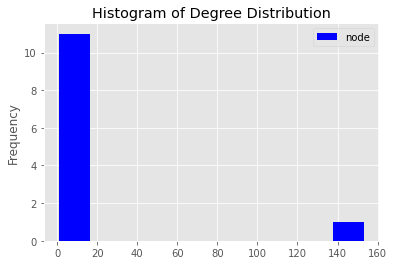

In [20]:
Degree_Dist.plot.hist(y='node',title='Histogram of Degree Distribution',color='blue')

In [21]:
#Calculating betweenness and closeness centrality
Closeness= nx.from_pandas_edgelist(df3, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(Closeness)
between = nx.betweenness_centrality(Closeness)
CC = nx.closeness_centrality(Closeness)

#Creating a dataframe for centrality 
df4 = pd.DataFrame.from_dict([between, CC])
df4 = pd.DataFrame.transpose(df4)
df4.columns = ['Betweenness_Centrality', 'Closeness_Centrality']

print(df4)


                     Betweenness_Centrality  Closeness_Centrality
850946013263273987                 0.824630              0.520635
768168025937752064                 0.107063              0.356522
1620606686670065664                0.000000              0.343096
1423771899222536193                0.095466              0.354978
1502090100498661376                0.012195              0.344538
...                                     ...                   ...
35927341                           0.000000              0.274707
1366385933109526535                0.000000              0.259084
1268042531008245767                0.000000              0.259084
826235053797543936                 0.000000              0.259084
1054213057851744256                0.000000              0.259084

[165 rows x 2 columns]


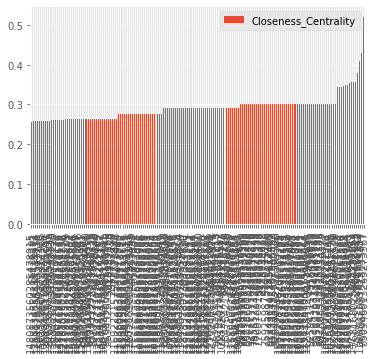

In [22]:
#Fetching nodes based in closeness and plotting bar graph
df5 = df4.sort_values('Closeness_Centrality')
df5.plot( y='Closeness_Centrality', kind='bar')
plt.show()

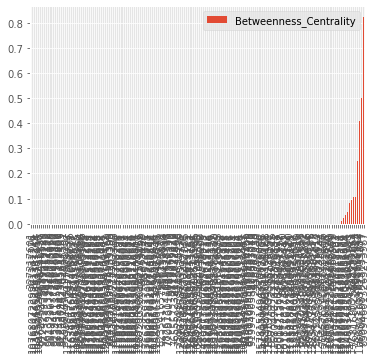

In [23]:
#Fetching nodes based in betweenness and plotting bar graph
df6 = df4.sort_values('Betweenness_Centrality')
c = '#7eb54e'
df6.plot( y='Betweenness_Centrality', kind='bar')
plt.show()

Modularity: 0.7643515764425937


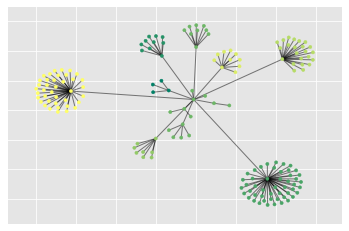

In [30]:
#Calculating the modularity and plotting the network graph
Mod_Grp = max((Graph.subgraph(c) for c in nx.connected_components(Graph)), key=len)

partition = community.best_partition(Mod_Grp)
modularity = community.modularity(partition, Mod_Grp)
print('Modularity:', modularity)

colors = [partition[n] for n in Mod_Grp.nodes()]
my_colors = plt.cm.summer
pos = nx.spring_layout(Mod_Grp, seed=10396950)
nx.draw_networkx_nodes(Mod_Grp, pos, node_color=colors, cmap = my_colors,  node_size=10)
nx.draw_networkx_edges(Mod_Grp, pos, alpha=0.5)

plt.show()